# Create geojson file from list of PUDO coords
See /home/test/Documents/PROJECTS/VFH/iPython_Notebooks/dv_pudo_profiles.ipynb for more info.  

ref: https://geoffboeing.com/2015/10/exporting-python-data-geojson/  
Huom: `with open(output_filename, 'wb') as output_file:` should be `'w'` not `'wb'`  

**Resources**  
geoJSON minifier: https://jsonformatter.org/json-minify  

In [1]:
import sys
sys.executable

'/home/test/anaconda3/envs/vfh/bin/python'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

from IPython.display import HTML, display
import datetime
import matplotlib.dates as mdates
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os

from datetime import datetime

import json

# Functions

In [3]:
# https://geoffboeing.com/2015/10/exporting-python-data-geojson/
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
        feature['geometry']['coordinates'] = [row[lon],row[lat]]
        for prop in properties:
            feature['properties'][prop] = int(row[prop])
        geojson['features'].append(feature)
    return geojson

# GeoJSON properties for file

In [4]:
# Define the properties of the PUDO geojson file
prop = ['type','counts', 'overlap']

# Variables

In [5]:
ward=10
this_day = "Monday"
this_tod = "amPeak"

In [6]:
if ward == 1:
    test_id1 = 20232410   # 13454935
    test_id2 = 13453946
elif ward == 10:
    test_id1 = 13467106 # Adelaide and John
    test_id2 = 13466303

# Read PUDO data from csv file

In [7]:
fname = '../../../Documents/PROJECTS/VFH/COT_PAGE/INTERIM_DATA/FROM_PGADMIN/all_pudo_mon.csv'
# fname = '~/Documents/PROJECTS/BDITTO/VFH/DATA_STORY/DATA/from_pgAdmin/all_pudo_mon.csv'

df = pd.read_csv(fname)

print(df.shape)
df.head(5)

(494842, 14)


,pickup_datetime,dropoff_datetime,pickup_ward2018,dropoff_ward2018,pickup_gc_intersection_id,dropoff_gc_intersection_id,dow,timewindow,pickup_geom,dropoff_geom,lat_pickup,lon_pickup,lat_dropoff,lon_dropoff
0,2018-09-03 00:00:00,2018-09-03 00:34:01,18.0,10.0,13447475,13467654,Monday,nightII,0101000020E61000005BE2AF6670DA53C01D22DBEA93E2...,0101000020E610000013E6CE309BD953C0938FE7777DD2...,43.770139,-79.413110,43.644454,-79.400097
1,2018-09-03 00:00:00,2018-09-03 00:10:54,10.0,13.0,13467763,13464030,Monday,nightII,0101000020E610000051E519D30AD953C0C23B89A05BD2...,0101000020E610000079E6DB3E68D853C00F3AF08356D5...,43.643421,-79.391286,43.666703,-79.381363
2,2018-09-03 00:00:00,2018-09-03 00:12:34,13.0,10.0,13464551,13467763,Monday,nightII,0101000020E6100000A342F6F3C6D753C0E8EE4CFEEDD4...,0101000020E610000051E519D30AD953C0C23B89A05BD2...,43.663513,-79.371518,43.643421,-79.391286
3,2018-09-03 00:00:00,2018-09-03 00:24:18,13.0,3.0,13465140,13470547,Monday,nightII,0101000020E6100000DF5023ED39D853C020ED2E3976D4...,0101000020E610000004410BFFE5E153C041B447898CCC...,43.659858,-79.378536,43.598039,-79.529663
4,2018-09-03 00:00:00,2018-09-03 00:18:21,8.0,13.0,14044860,14673305,Monday,nightII,0101000020E6100000A37FC1EFB8DC53C070C432B4FCDB...,0101000020E61000008C84E11C68D853C062D98093A3D5...,43.718649,-79.448788,43.669054,-79.381355


In [8]:
list(df)

['pickup_datetime',
 'dropoff_datetime',
 'pickup_ward2018',
 'dropoff_ward2018',
 'pickup_gc_intersection_id',
 'dropoff_gc_intersection_id',
 'dow',
 'timewindow',
 'pickup_geom',
 'dropoff_geom',
 'lat_pickup',
 'lon_pickup',
 'lat_dropoff',
 'lon_dropoff']

In [9]:
print(df.loc[(df['pickup_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak'),'pickup_gc_intersection_id'].count())
df.loc[(df['pickup_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak')]

62


,pickup_datetime,dropoff_datetime,pickup_ward2018,dropoff_ward2018,pickup_gc_intersection_id,dropoff_gc_intersection_id,dow,timewindow,pickup_geom,dropoff_geom,lat_pickup,lon_pickup,lat_dropoff,lon_dropoff
23281,2018-09-03 07:00:00,2018-09-03 07:15:29,10.0,8.0,13467106,13457779,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E6100000C0DF9FBA08DB53C0EFD33A6FF8D9...,43.647857,-79.390293,43.702894,-79.422408
30889,2018-09-03 07:00:00,2018-09-03 07:12:22,10.0,13.0,13467106,14020387,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E6100000A27CF0C3A9D853C042864949B3D4...,43.647857,-79.390293,43.661721,-79.385362
57648,2018-09-10 08:00:00,2018-09-10 08:07:13,10.0,10.0,13467106,14036081,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E61000009403BF0B90D853C03715C0CCABD2...,43.647857,-79.390293,43.645868,-79.383792
58455,2018-09-10 07:00:00,2018-09-10 07:03:32,10.0,10.0,13467106,13466789,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E6100000287B62D574D853C04C78569326D3...,43.647857,-79.390293,43.649615,-79.382131
63584,2018-09-10 07:00:00,2018-09-10 07:38:00,10.0,16.0,13467106,13448747,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E6100000689BA10CA3D653C01E97991B51E1...,43.647857,-79.390293,43.760288,-79.353702
64637,2018-09-10 08:00:00,2018-09-10 08:05:30,10.0,10.0,13467106,13466858,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E6100000406EE54395D853C02908239818D3...,43.647857,-79.390293,43.649188,-79.384110
66260,2018-09-10 08:00:00,2018-09-10 08:08:51,10.0,10.0,13467106,13468181,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E6100000560A723155D853C0A38C7E55EAD1...,43.647857,-79.390293,43.639964,-79.380200
66261,2018-09-10 08:00:00,2018-09-10 08:08:51,10.0,10.0,13467106,13468181,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E6100000560A723155D853C0A38C7E55EAD1...,43.647857,-79.390293,43.639964,-79.380200
70212,2018-09-10 07:00:00,2018-09-10 07:05:35,10.0,13.0,13467106,13466551,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E610000086DEC9443DD853C0AAD43DC955D3...,43.647857,-79.390293,43.651055,-79.378740
70842,2018-09-10 07:00:00,2018-09-10 07:36:04,10.0,20.0,13467106,13452903,Monday,amPeak,0101000020E61000005EDB6E91FAD853C025A398F6ECD2...,0101000020E6100000854D4E01F1D053C0FD90635DAFDD...,43.647857,-79.390293,43.731914,-79.264710


In [10]:
df.loc[(df['dropoff_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak'),'dropoff_gc_intersection_id'].count()

13

In [11]:
print(df.loc[(df['pickup_gc_intersection_id']==test_id1) & 
       (df['dow']=='Monday') & (df['timewindow']=='pmPeak') &
       (df['pickup_ward2018']==10.0),
       'dropoff_gc_intersection_id'].count())

df.loc[(df['pickup_gc_intersection_id']==test_id1) & 
       (df['dow']=='Monday') & (df['timewindow']=='pmPeak') &
       (df['pickup_ward2018']==10.0), ['pickup_datetime','pickup_gc_intersection_id','dropoff_ward2018','dow','timewindow']]

37


,pickup_datetime,pickup_gc_intersection_id,dropoff_ward2018,dow,timewindow
10862,2018-09-10 17:00:00,13467106,10.0,Monday,pmPeak
25290,2018-09-03 17:00:00,13467106,10.0,Monday,pmPeak
30349,2018-09-03 16:00:00,13467106,10.0,Monday,pmPeak
33318,2018-09-03 16:00:00,13467106,10.0,Monday,pmPeak
35570,2018-09-03 16:00:00,13467106,13.0,Monday,pmPeak
44020,2018-09-03 17:00:00,13467106,10.0,Monday,pmPeak
61253,2018-09-10 16:00:00,13467106,11.0,Monday,pmPeak
64828,2018-09-10 16:00:00,13467106,10.0,Monday,pmPeak
70430,2018-09-10 16:00:00,13467106,10.0,Monday,pmPeak
77031,2018-09-10 17:00:00,13467106,3.0,Monday,pmPeak


In [12]:
print(df.loc[(df['pickup_gc_intersection_id']==test_id2) & 
       (df['dow']=='Monday') & (df['timewindow']=='pmPeak') &
       (df['pickup_ward2018']==10.0),
       'dropoff_gc_intersection_id'].count())

df.loc[(df['pickup_gc_intersection_id']==test_id2) & 
       (df['dow']=='Monday') & (df['timewindow']=='pmPeak') &
       (df['pickup_ward2018']==10.0), ['pickup_datetime','pickup_gc_intersection_id','dropoff_ward2018','dow','timewindow']]

6


,pickup_datetime,pickup_gc_intersection_id,dropoff_ward2018,dow,timewindow
297451,2018-09-24 17:00:00,13466303,13.0,Monday,pmPeak
335514,2018-09-10 17:00:00,13466303,10.0,Monday,pmPeak
355493,2018-09-17 17:00:00,13466303,10.0,Monday,pmPeak
385678,2018-09-24 17:00:00,13466303,13.0,Monday,pmPeak
423080,2018-09-03 17:00:00,13466303,11.0,Monday,pmPeak
449009,2018-09-10 17:00:00,13466303,13.0,Monday,pmPeak


In [13]:
thisid = 13453946

print(df.loc[(df['dropoff_gc_intersection_id']==thisid) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak'),
       'dropoff_gc_intersection_id'].count())

df.loc[(df['dropoff_gc_intersection_id']==thisid) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak')][['pickup_ward2018','dropoff_ward2018','dow','timewindow']]

17


,pickup_ward2018,dropoff_ward2018,dow,timewindow
21103,10.0,1.0,Monday,amPeak
55108,1.0,1.0,Monday,amPeak
125591,7.0,1.0,Monday,amPeak
125592,1.0,1.0,Monday,amPeak
133786,5.0,1.0,Monday,amPeak
133882,15.0,1.0,Monday,amPeak
141570,7.0,1.0,Monday,amPeak
286280,3.0,1.0,Monday,amPeak
286295,1.0,1.0,Monday,amPeak
298822,8.0,1.0,Monday,amPeak


In [14]:
thisid = 13453946

print(df.loc[((df['pickup_gc_intersection_id']==thisid) | (df['dropoff_gc_intersection_id']==thisid)) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak'),
       'dropoff_gc_intersection_id'].count())

df.loc[((df['pickup_gc_intersection_id']==thisid) | (df['dropoff_gc_intersection_id']==thisid)) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak')][['pickup_ward2018','dropoff_ward2018','dow','timewindow']]

19


,pickup_ward2018,dropoff_ward2018,dow,timewindow
21103,10.0,1.0,Monday,amPeak
55108,1.0,1.0,Monday,amPeak
82562,1.0,1.0,Monday,amPeak
125591,7.0,1.0,Monday,amPeak
125592,1.0,1.0,Monday,amPeak
133786,5.0,1.0,Monday,amPeak
133882,15.0,1.0,Monday,amPeak
141570,7.0,1.0,Monday,amPeak
238816,1.0,21.0,Monday,amPeak
286280,3.0,1.0,Monday,amPeak


# Housekeeping

## 1. Round lat, lon to 4 decimal places

In [15]:
n=4 # number of decimals to round to

df['lat_pickup'] = df['lat_pickup'].round(decimals=n)
df['lon_pickup'] = df['lon_pickup'].round(decimals=n)

df['lat_dropoff'] = df['lat_dropoff'].round(decimals=n)
df['lon_dropoff'] = df['lon_dropoff'].round(decimals=n)

In [16]:
np.round(-79.60573035, decimals=n)

-79.6057

In [17]:
np.round(43.7289273, decimals=n)

43.7289

## 2. Filter out rows where neither pickup or dropoff wards are the ward of interest
Make col `keep` = 1 for where pick-up or for drop-off wards are the ward of interest

In [18]:
# Assign a Pickup or Dropoff in column 'type'
df['keep'] = np.nan
df['latitude'] = np.nan
df['longitude'] = np.nan

df.loc[(df['pickup_ward2018']==ward) | (df['dropoff_ward2018']==ward), 'keep'] = 1

In [19]:
# Check
df['keep'].unique()

array([ 1., nan])

In [20]:
# Keep only rows where `keep` is not null
df = df[df['keep'].notnull()]

In [21]:
# Check
df['keep'].unique()

array([1.])

In [22]:
print(df.shape)

(166086, 17)


In [23]:
df.head(5)

,pickup_datetime,dropoff_datetime,pickup_ward2018,dropoff_ward2018,pickup_gc_intersection_id,dropoff_gc_intersection_id,dow,timewindow,pickup_geom,dropoff_geom,lat_pickup,lon_pickup,lat_dropoff,lon_dropoff,keep,latitude,longitude
0,2018-09-03 00:00:00,2018-09-03 00:34:01,18.0,10.0,13447475,13467654,Monday,nightII,0101000020E61000005BE2AF6670DA53C01D22DBEA93E2...,0101000020E610000013E6CE309BD953C0938FE7777DD2...,43.7701,-79.4131,43.6445,-79.4001,1.0,NaN,NaN
1,2018-09-03 00:00:00,2018-09-03 00:10:54,10.0,13.0,13467763,13464030,Monday,nightII,0101000020E610000051E519D30AD953C0C23B89A05BD2...,0101000020E610000079E6DB3E68D853C00F3AF08356D5...,43.6434,-79.3913,43.6667,-79.3814,1.0,NaN,NaN
2,2018-09-03 00:00:00,2018-09-03 00:12:34,13.0,10.0,13464551,13467763,Monday,nightII,0101000020E6100000A342F6F3C6D753C0E8EE4CFEEDD4...,0101000020E610000051E519D30AD953C0C23B89A05BD2...,43.6635,-79.3715,43.6434,-79.3913,1.0,NaN,NaN
7,2018-09-03 00:00:00,2018-09-03 00:25:12,10.0,23.0,13467149,13445567,Monday,nightII,0101000020E6100000114B23960FD953C0EB083B20E4D2...,0101000020E610000021F13FBAB7D153C0B3D1137822E4...,43.6476,-79.3916,43.7823,-79.2768,1.0,NaN,NaN
8,2018-09-03 00:00:00,2018-09-03 00:13:19,10.0,10.0,14621058,13467746,Monday,nightII,0101000020E6100000363D49368ED853C0D81E02B61FD2...,0101000020E610000045A22B6CE1DA53C095E3C7F86DD2...,43.6416,-79.3837,43.6440,-79.4200,1.0,NaN,NaN


In [24]:
# Test again!! => ok
print(df.loc[(df['pickup_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak'),'pickup_gc_intersection_id'].count())
df.loc[(df['dropoff_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak'),'dropoff_gc_intersection_id'].count()

62


13

In [25]:
# Test again!! => ok
print(df.loc[(df['pickup_gc_intersection_id']==test_id1) & (df['dow']==this_day) & 
             (df['pickup_ward2018']==ward) &
             (df['timewindow']==this_tod),'pickup_gc_intersection_id'].count())

62


## 3. Mark if row is a pickup or a dropoff
pickup is where pickup ward == ward, dropoff is where dropoff_ward == ward  
Note that a row can contain **both** a pickup and a dropoff !!!  

In [26]:
df['pu'] = np.nan
df['do'] = np.nan

In [27]:
df.loc[df['pickup_ward2018']==ward, 'pu'] = 1

In [28]:
df.loc[df['dropoff_ward2018']==ward, 'do'] = 1

In [29]:
# Check
df.loc[df['dropoff_ward2018']==ward, 
       ['dow','timewindow','pickup_datetime','dropoff_datetime',
        'lat_pickup','lon_pickup','pickup_gc_intersection_id',
        'lat_dropoff','lon_dropoff','dropoff_gc_intersection_id',
        'pickup_ward2018','dropoff_ward2018','pu','do']].head(11)

,dow,timewindow,pickup_datetime,dropoff_datetime,lat_pickup,lon_pickup,pickup_gc_intersection_id,lat_dropoff,lon_dropoff,dropoff_gc_intersection_id,pickup_ward2018,dropoff_ward2018,pu,do
0,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:34:01,43.7701,-79.4131,13447475,43.6445,-79.4001,13467654,18.0,10.0,NaN,1.0
2,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:12:34,43.6635,-79.3715,13464551,43.6434,-79.3913,13467763,13.0,10.0,NaN,1.0
8,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:13:19,43.6416,-79.3837,14621058,43.6440,-79.4200,13467746,10.0,10.0,1.0,1.0
10,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:07:58,43.6420,-79.3805,13467929,43.6437,-79.3900,13467729,10.0,10.0,1.0,1.0
18,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:06:50,43.6450,-79.3905,13467570,43.6413,-79.4030,14230121,10.0,10.0,1.0,1.0
19,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:09:02,43.6394,-79.3868,13468256,43.6479,-79.4092,13467136,10.0,10.0,1.0,1.0
20,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:10:09,43.6516,-79.3711,13466440,43.6352,-79.4013,13468720,13.0,10.0,NaN,1.0
21,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:16:48,43.6994,-79.4078,13458270,43.6473,-79.3929,13467204,12.0,10.0,NaN,1.0
22,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:21:32,43.7099,-79.4043,13456603,43.6433,-79.3982,13467796,8.0,10.0,NaN,1.0
25,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:10:28,43.6672,-79.3865,20141211,43.6403,-79.3984,20364650,13.0,10.0,NaN,1.0


In [30]:
thisid = 13453946

print(df.loc[(df['dropoff_gc_intersection_id']==thisid) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak'),
       'dropoff_gc_intersection_id'].count())

df.loc[(df['dropoff_gc_intersection_id']==thisid) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak')][['pickup_ward2018','dropoff_ward2018','dow','timewindow','pu','do']]

1


,pickup_ward2018,dropoff_ward2018,dow,timewindow,pu,do
21103,10.0,1.0,Monday,amPeak,1.0,NaN


## 4a. Aggregate pickups and dropoffs for this_tod

In [31]:
list(df)

['pickup_datetime',
 'dropoff_datetime',
 'pickup_ward2018',
 'dropoff_ward2018',
 'pickup_gc_intersection_id',
 'dropoff_gc_intersection_id',
 'dow',
 'timewindow',
 'pickup_geom',
 'dropoff_geom',
 'lat_pickup',
 'lon_pickup',
 'lat_dropoff',
 'lon_dropoff',
 'keep',
 'latitude',
 'longitude',
 'pu',
 'do']

In [32]:
df_agg_pu = pd.DataFrame()

df_agg_pu = df.loc[(df['pickup_ward2018']==ward) & (df['timewindow']==this_tod)].groupby(
    ['dow','timewindow','lat_pickup','lon_pickup','pickup_gc_intersection_id']
    ).size().reset_index(name='pcounts')

df_agg_pu = df_agg_pu.rename(columns={'lat_pickup': 'latitude'})
df_agg_pu = df_agg_pu.rename(columns={'lon_pickup': 'longitude'})
df_agg_pu = df_agg_pu.rename(columns={'pickup_gc_intersection_id': 'intersection_id'})

df_agg_pu.head(11)

,dow,timewindow,latitude,longitude,intersection_id,pcounts
0,Monday,amPeak,43.6311,-79.4155,30021269,1
1,Monday,amPeak,43.6316,-79.4273,13469141,1
2,Monday,amPeak,43.6320,-79.4195,20229234,1
3,Monday,amPeak,43.6322,-79.4005,13469040,2
4,Monday,amPeak,43.6324,-79.3534,13468945,1
5,Monday,amPeak,43.6325,-79.4109,13469034,12
6,Monday,amPeak,43.6334,-79.3995,13468904,11
7,Monday,amPeak,43.6335,-79.3982,30102299,8
8,Monday,amPeak,43.6336,-79.4218,13468912,1
9,Monday,amPeak,43.6337,-79.3979,30102303,41


In [33]:
df_agg_pu.loc[(df_agg_pu['intersection_id']==13453946) & 
                 (df_agg_pu['timewindow']=='amPeak')                 
                ]

,dow,timewindow,latitude,longitude,intersection_id,pcounts


In [34]:
df_agg_do = pd.DataFrame()

df_agg_do = df.loc[(df['dropoff_ward2018']==ward) & (df['timewindow']==this_tod)].groupby(
    ['dow','timewindow','lat_dropoff','lon_dropoff','dropoff_gc_intersection_id']
    ).size().reset_index(name='dcounts')

df_agg_do = df_agg_do.rename(columns={'lat_dropoff': 'latitude'})
df_agg_do = df_agg_do.rename(columns={'lon_dropoff': 'longitude'})
df_agg_do = df_agg_do.rename(columns={'dropoff_gc_intersection_id': 'intersection_id'})

df_agg_do.head(11)

,dow,timewindow,latitude,longitude,intersection_id,dcounts
0,Monday,amPeak,43.6309,-79.4198,13469187,1
1,Monday,amPeak,43.6311,-79.4155,30021269,2
2,Monday,amPeak,43.6312,-79.4102,13969590,2
3,Monday,amPeak,43.6316,-79.4273,13469141,6
4,Monday,amPeak,43.6318,-79.4157,30028869,2
5,Monday,amPeak,43.6320,-79.4195,20229234,5
6,Monday,amPeak,43.6322,-79.4005,13469040,1
7,Monday,amPeak,43.6325,-79.4109,13469034,20
8,Monday,amPeak,43.6327,-79.4249,13469026,2
9,Monday,amPeak,43.6327,-79.4222,13469023,1


In [35]:
df_agg_do.loc[(df_agg_do['intersection_id']==13453946) & 
                 (df_agg_do['timewindow']=='amPeak')                 
                ]

,dow,timewindow,latitude,longitude,intersection_id,dcounts


In [36]:
print(df_agg_pu.shape)
print(df_agg_do.shape)

(600, 6)
(567, 6)


In [37]:
# Check for duplicate intersection_id
df_agg_pu.loc[df_agg_pu['intersection_id'].duplicated()]

,dow,timewindow,latitude,longitude,intersection_id,pcounts


In [38]:
# Check for duplicate intersection_id
df_agg_do.loc[df_agg_do['intersection_id'].duplicated()]

,dow,timewindow,latitude,longitude,intersection_id,dcounts


In [39]:
df_agg_pu.loc[(df_agg_pu['intersection_id']==20232410) ]

,dow,timewindow,latitude,longitude,intersection_id,pcounts


In [40]:
df_agg_do.loc[(df_agg_do['intersection_id']==20232410) ]

,dow,timewindow,latitude,longitude,intersection_id,dcounts


## 5. Stack pickups on top of dropoffs

In [41]:
# Add empty columns to allow stacking

df_agg_pu=df_agg_pu.assign(dcounts=0)
df_agg_do=df_agg_do.assign(pcounts=0)

In [42]:
# stack
print(df_agg_pu.shape)
print(df_agg_do.shape)

df_merge=pd.concat([df_agg_pu, df_agg_do],sort=False)

print(df_merge.shape)
df_merge.head(11)

(600, 7)
(567, 7)
(1167, 7)


,dow,timewindow,latitude,longitude,intersection_id,pcounts,dcounts
0,Monday,amPeak,43.6311,-79.4155,30021269,1,0
1,Monday,amPeak,43.6316,-79.4273,13469141,1,0
2,Monday,amPeak,43.6320,-79.4195,20229234,1,0
3,Monday,amPeak,43.6322,-79.4005,13469040,2,0
4,Monday,amPeak,43.6324,-79.3534,13468945,1,0
5,Monday,amPeak,43.6325,-79.4109,13469034,12,0
6,Monday,amPeak,43.6334,-79.3995,13468904,11,0
7,Monday,amPeak,43.6335,-79.3982,30102299,8,0
8,Monday,amPeak,43.6336,-79.4218,13468912,1,0
9,Monday,amPeak,43.6337,-79.3979,30102303,41,0


In [43]:
# Check
this_id=20232410  #13453946
df_merge.loc[df_merge['intersection_id']==this_id]

,dow,timewindow,latitude,longitude,intersection_id,pcounts,dcounts


## 6. Group on common `intersection_id`

In [44]:
df_merge.loc[df_merge['intersection_id']==13453946]

,dow,timewindow,latitude,longitude,intersection_id,pcounts,dcounts


In [45]:
df_merge.loc[df_merge['intersection_id']==30092304]

,dow,timewindow,latitude,longitude,intersection_id,pcounts,dcounts


In [46]:
df_merge_gr=pd.DataFrame()

df_merge_gr=df_merge.groupby(['intersection_id','latitude','longitude'],as_index=False).sum()

print(df_merge_gr.shape)
df_merge_gr.head(11)

(667, 5)


,intersection_id,latitude,longitude,pcounts,dcounts
0,13465870,43.6554,-79.3852,16,18
1,13465901,43.6552,-79.3861,29,26
2,13465978,43.6547,-79.3841,5,2
3,13466018,43.6545,-79.3849,45,22
4,13466030,43.6545,-79.3904,12,18
5,13466048,43.6543,-79.3832,40,42
6,13466064,43.6543,-79.3915,11,80
7,13466190,43.6534,-79.3864,3,53
8,13466234,43.6531,-79.3876,9,52
9,13466250,43.6530,-79.3826,5,33


In [47]:
df_merge_gr.loc[df_merge_gr['intersection_id']==20232410]

,intersection_id,latitude,longitude,pcounts,dcounts


In [48]:
# Check
this_id=20232410  #13453946
df_merge_gr.loc[df_merge_gr['intersection_id']==this_id]

,intersection_id,latitude,longitude,pcounts,dcounts


## 6. Make the dataframes for each layer!

### a. PUDO layer from `df_merge_gr`

In [49]:
df_pudo_layer = pd.DataFrame()

In [50]:
df_pudo_layer = df_merge_gr.loc[(df_merge_gr['pcounts']>0) & (df_merge_gr['dcounts']>0)]

In [51]:
print(df_pudo_layer.shape)

(500, 5)


In [52]:
# Check
this_id=20232410   #13453946
df_pudo_layer.loc[df_pudo_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,pcounts,dcounts


### a. PU layer and DO layer from `df_merge`

In [53]:
df_pu_layer = pd.DataFrame()
df_do_layer = pd.DataFrame()

In [54]:
df_pu_layer = df_merge_gr.loc[(df_merge_gr['pcounts']>0) & (df_merge_gr['dcounts']==0)]
df_do_layer = df_merge_gr.loc[(df_merge_gr['pcounts']==0) & (df_merge_gr['dcounts']>0)]

In [55]:
# Check
this_id=20232410   #13453946
df_pu_layer.loc[df_pu_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,pcounts,dcounts


In [56]:
# Check
this_id=20232410   #13453946
df_do_layer.loc[df_do_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,pcounts,dcounts


# Histograms of counts
https://mode.com/example-gallery/python_histogram/

In [57]:
print('w' +repr(ward), this_day, this_tod)

w10 Monday amPeak


In [58]:
# Check for duplicate intersection_id
df_pu_layer.loc[df_pu_layer['intersection_id'].duplicated()]

,intersection_id,latitude,longitude,pcounts,dcounts


In [59]:
print(df_pu_layer.shape)
print(df_pu_layer['pcounts'].max())
print(df_pu_layer['pcounts'].min())
df_pu_layer.head(5)

(100, 5)
21
1


,intersection_id,latitude,longitude,pcounts,dcounts
10,13466303,43.6528,-79.3934,3,0
12,13466363,43.6525,-79.3991,8,0
20,13466432,43.6521,-79.3987,1,0
32,13466535,43.6514,-79.3999,2,0
34,13466548,43.6513,-79.3953,4,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa51f9a91d0>]],
      dtype=object)

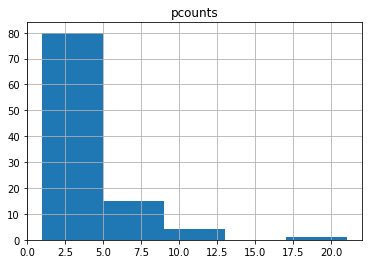

In [60]:
df_pu_layer.hist(column='pcounts',bins=5)

21
bin width: 2.1


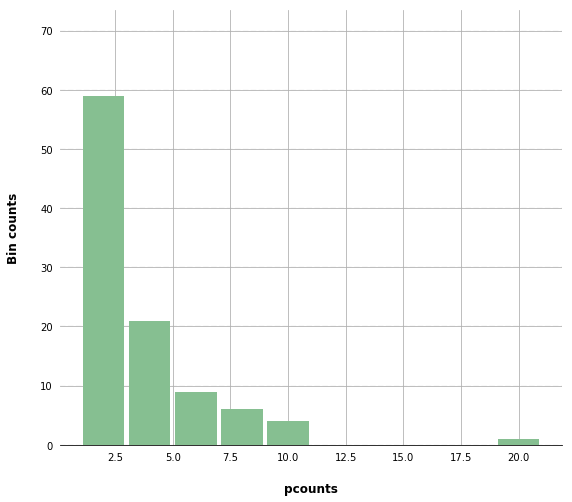

In [81]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

n = 10  #20
print(df_pu_layer['pcounts'].max())
print('bin width: ' + repr(df_pu_layer['pcounts'].max()/n))

ax = df_pu_layer.hist(column='pcounts', bins=n, grid=True, figsize=(9,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("pcounts", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Bin counts", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

38
bin width: 1.0857142857142856


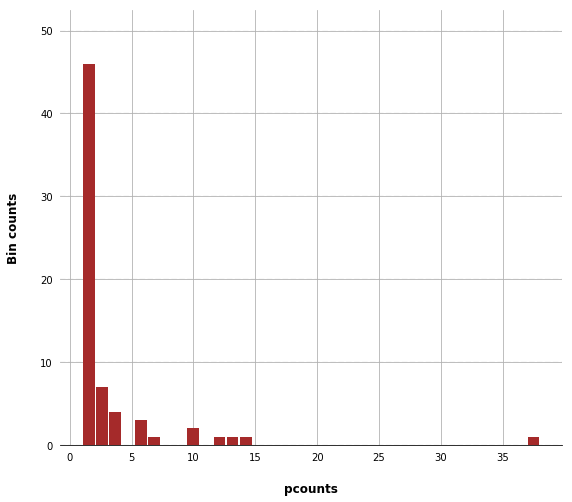

In [62]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

n = 35
print(df_do_layer['dcounts'].max())
print('bin width: ' + repr(df_do_layer['dcounts'].max()/n))

ax = df_do_layer.hist(column='dcounts', bins=n, grid=True, figsize=(9,8), color='brown', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("pcounts", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Bin counts", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [63]:
# df=

# Save to geojson

In [64]:
print('w' +repr(ward), this_day, this_tod)

w10 Monday amPeak


In [65]:
df_do_layer.head(5)

,intersection_id,latitude,longitude,pcounts,dcounts
23,13466456,43.6519,-79.3993,0,1
30,13466518,43.6515,-79.4010,0,1
36,13466564,43.6512,-79.3938,0,1
64,13466717,43.6502,-79.3898,0,2
82,13466827,43.6490,-79.3559,0,3


In [66]:
this_id=13453946
df_pudo_layer.loc[df_pudo_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,pcounts,dcounts


In [67]:
df_pudo_layer.sort_values('dcounts',ascending=False).head(9)

,intersection_id,latitude,longitude,pcounts,dcounts
224,13467389,43.6460,-79.3791,58,380
382,13468181,43.6400,-79.3802,184,374
168,13467163,43.6473,-79.3797,17,325
539,20034906,43.6464,-79.3806,84,285
652,30102306,43.6338,-79.3981,80,279
75,13466789,43.6496,-79.3821,13,236
273,13467593,43.6448,-79.3850,68,204
145,13467083,43.6479,-79.3836,17,203
68,13466743,43.6499,-79.3808,19,178


## Apply cut-off filter
Only counts > `c` will be saved.  

In [68]:
c = 9 # cut-off

In [82]:
print(df_pu_layer.loc[(df_pu_layer['pcounts']>=c),'pcounts'].count())
df_pu_layer.loc[(df_pu_layer['pcounts']>=c)]

5


,intersection_id,latitude,longitude,pcounts,dcounts
352,13467988,43.6418,-79.4061,10,0
395,13468377,43.6385,-79.3922,10,0
549,20054533,43.6363,-79.4009,10,0
559,20054638,43.6368,-79.4024,21,0
574,20139658,43.6497,-79.4029,10,0


In [83]:
print(df_do_layer.loc[(df_do_layer['dcounts']>=c),'dcounts'].count())
df_do_layer.loc[(df_do_layer['dcounts']>=c)]

6


,intersection_id,latitude,longitude,pcounts,dcounts
139,13467067,43.6477,-79.3610,0,14
222,13467373,43.6462,-79.3849,0,38
296,13467665,43.6439,-79.3690,0,10
400,13468491,43.6379,-79.4228,0,12
485,14065206,43.6332,-79.4153,0,10
614,30060461,43.6342,-79.4181,0,13


In [88]:
print(df_pudo_layer.loc[(df_pudo_layer['dcounts']>=c) & (df_pudo_layer['pcounts']>=c),'dcounts'].count())
df_pudo_layer.loc[(df_pudo_layer['dcounts']>=c)]

134


,intersection_id,latitude,longitude,pcounts,dcounts
0,13465870,43.6554,-79.3852,16,18
1,13465901,43.6552,-79.3861,29,26
3,13466018,43.6545,-79.3849,45,22
4,13466030,43.6545,-79.3904,12,18
5,13466048,43.6543,-79.3832,40,42
6,13466064,43.6543,-79.3915,11,80
7,13466190,43.6534,-79.3864,3,53
8,13466234,43.6531,-79.3876,9,52
9,13466250,43.6530,-79.3826,5,33
11,13466350,43.6524,-79.3907,25,26


In [72]:
this_id=13453946
df_pudo_layer.loc[ ((df_pudo_layer['pcounts']+df_pudo_layer['dcounts']) >= c) &
                  (df_pudo_layer['intersection_id'] == thisid)
                                                    ]

,intersection_id,latitude,longitude,pcounts,dcounts


In [73]:
geojson_pu_layer = df_to_geojson(df_pu_layer.loc[(df_pu_layer['pcounts']>=c)], ['pcounts'])

In [74]:
geojson_do_layer = df_to_geojson(df_do_layer.loc[(df_do_layer['dcounts']>=c)], ['dcounts'])

In [75]:
geojson_pudo_layer = df_to_geojson(df_pudo_layer.loc[(df_pudo_layer['pcounts']>=c) &
                                                     (df_pudo_layer['dcounts']>=c)
                                                    ], ['pcounts','dcounts'])

# Write geojson to file

## Aggregated points

In [76]:
print('w' +repr(ward), this_day, this_tod)

w10 Monday amPeak


In [77]:
mydir = '../../../Documents/PROJECTS/VFH/COT_PAGE/INTERIM_DATA/INDIVIDUAL_GEOJSONS/'
# mydir = '/home/nangini/Documents/PROJECTS/BDITTO/VFH/DATA_STORY/DATA/INDIVIDUAL_GEOJSONS/'


output_filename = mydir + 'w' + repr(ward) + '_092018_' + this_day + '_' + this_tod + '_pu_cutoff.geojson'

with open(output_filename, 'w') as output_file:
    output_file.write('')
    json.dump(geojson_pu_layer, output_file, indent=2) 

In [78]:
output_filename = mydir + 'w' + repr(ward) + '_092018_' + this_day + '_' + this_tod + '_do_cutoff.geojson'

with open(output_filename, 'w') as output_file:
    output_file.write('')
    json.dump(geojson_do_layer, output_file, indent=2) 

In [79]:
output_filename = mydir + 'w' + repr(ward) + '_092018_' + this_day + '_' + this_tod + '_pudo_cutoff.geojson'

with open(output_filename, 'w') as output_file:
    output_file.write('')
    json.dump(geojson_pudo_layer, output_file, indent=2) 

`
$ ls -lh ~/Documents/PROJECTS/VFH/COT_PAGE/INTERIM_DATA/INDIVIDUAL_GEOJSONS/
total 216K
-rw-r--r-- 1 test test 109K Dec  9 11:23 w1_092018_Monday_pmPeak_do_agg.geojson
-rw-r--r-- 1 test test 104K Dec  9 11:23 w1_092018_Monday_pmPeak_pu_agg.geojson
`


`
$ ls -lh src/geojson/
-rw-r--r-- 1 test test 328K Dec  4 15:46 w1_092018_Monday_amPeak_agg.geojson
-rw-r--r-- 1 test test 753K Dec  4 13:51 w1_092018_Monday_amPeak.geojson
`
